# 1. Importing Required Libraries 

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Loading the Dataset

In [4]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing Dataset
california = fetch_california_housing()


# 3. Converting California Housing Dataset to a Pandas DataFrame

In [61]:
# Create a pandas DataFrame using the California dataset
california_df = pd.DataFrame(california.data, columns = california.feature_names)

california_df['MEDV'] = california.target

# Print dataset
print(california_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

# 4. Check to see if there are Null Values

In [62]:
# Check if there are Null Values

california_df.isna().sum()

# california_df.info()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

# 5. Explore the Dataset

In [7]:
print(california_df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


# 6. Assigning the dependent and independent variables

In [63]:
X = california_df.drop(['MEDV'], axis=1)
y = california_df['MEDV']

In [64]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MEDV, Length: 20640, dtype: float64

# 7. Train Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train a Linear Regression Model

In [115]:
lineareg = LinearRegression()
lineareg.fit(X_train, y_train)

lineareg.score(X_test, y_test)

0.5757877060324511

In [119]:
y_pred = lineareg.predict(X_test)
# y_pred


# Determine the following:
1. Mean Squared Error
2. R-squared

In [128]:
# evaluate the model

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse: .2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae: .2f}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2: .2f}')

Mean Squared Error:  0.56
Mean Absolute Error:  0.53
R-squared:  0.58


The model's predictions, on average, have a squared difference of 0.56 from the actual values (MSE).
The absolute difference between predicted and actual values, on average, is 0.53 (MAE).
The model explains approximately 58% of the variance in the target variable (R2).

# 9. Join Train data

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

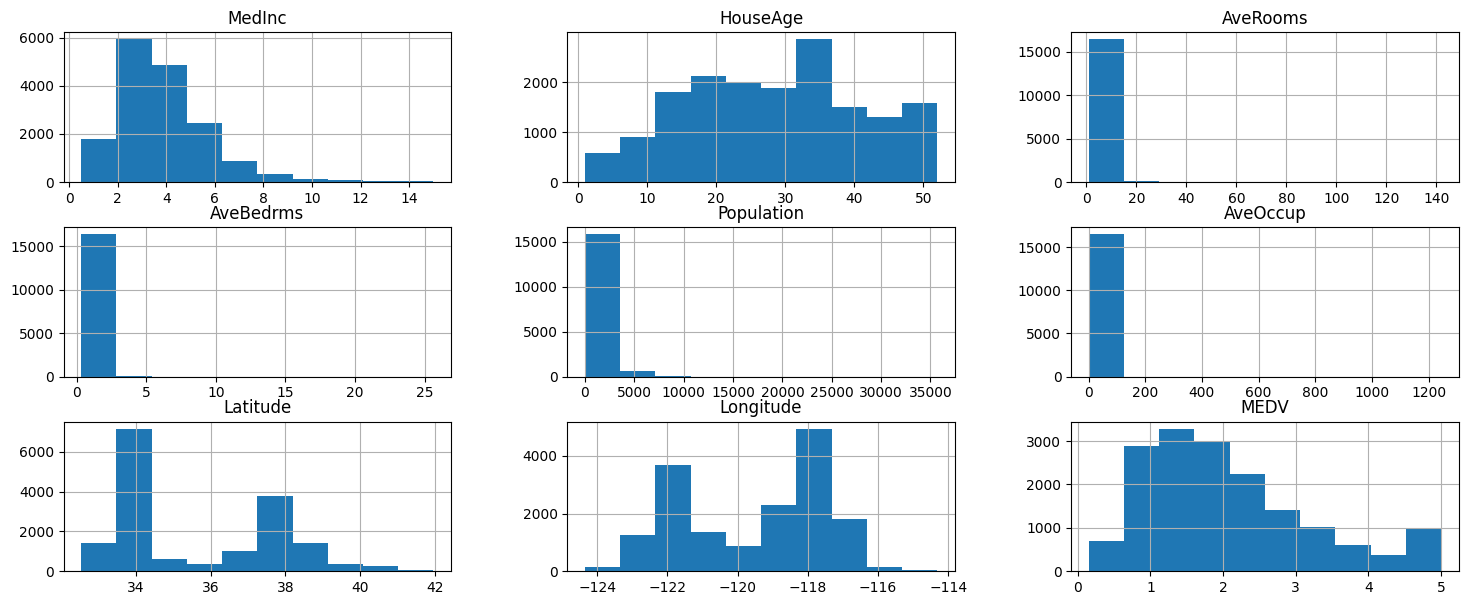

In [74]:
# Join the X train and y train data
train_data = X_train.join(y_train)

# Show the Histogram first
train_data.hist(figsize=(18, 7))

# Turn to Logarithm to prevent skewness

In [78]:
train_data['AveRooms'] = np.log(train_data['AveRooms'] + 1)
train_data['AveBedrms'] = np.log(train_data['AveBedrms'] + 1)
train_data['Population'] = np.log(train_data['Population'] + 1)
train_data['AveOccup'] = np.log(train_data['AveOccup'] + 1)


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

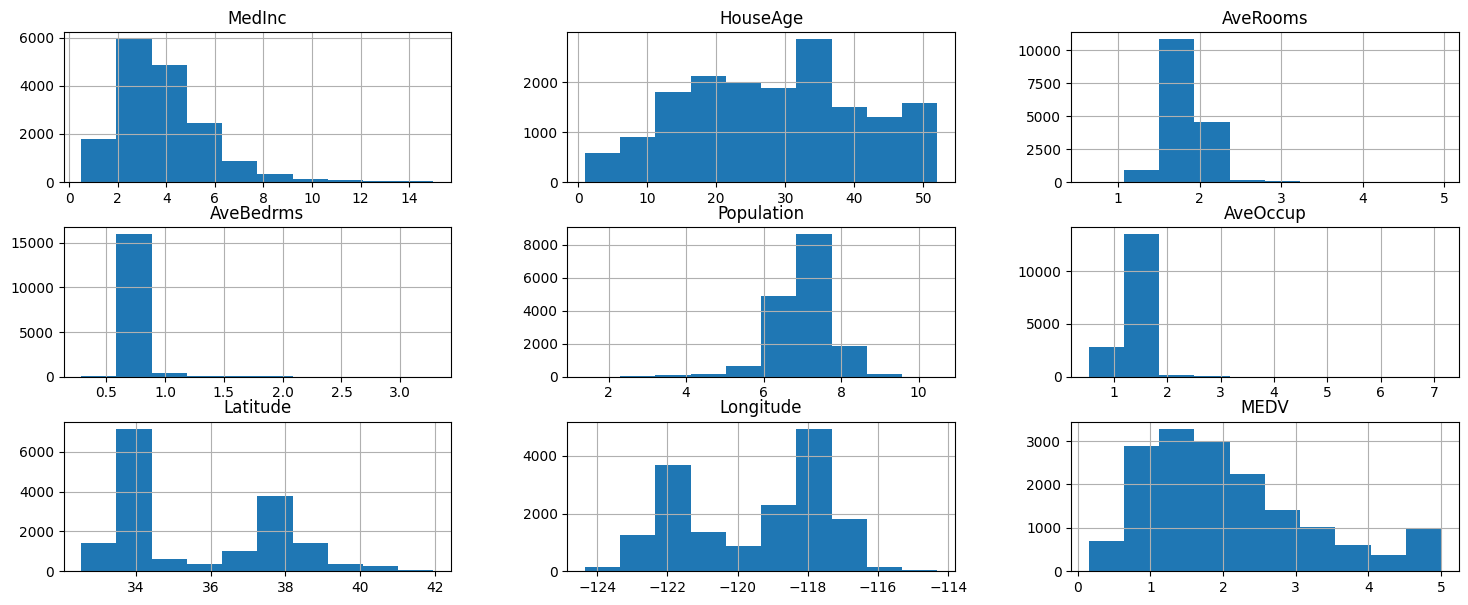

In [79]:
# Show the Histogram first
train_data.hist(figsize=(18, 7))

# Present a correlation matrix among the variables

<Axes: >

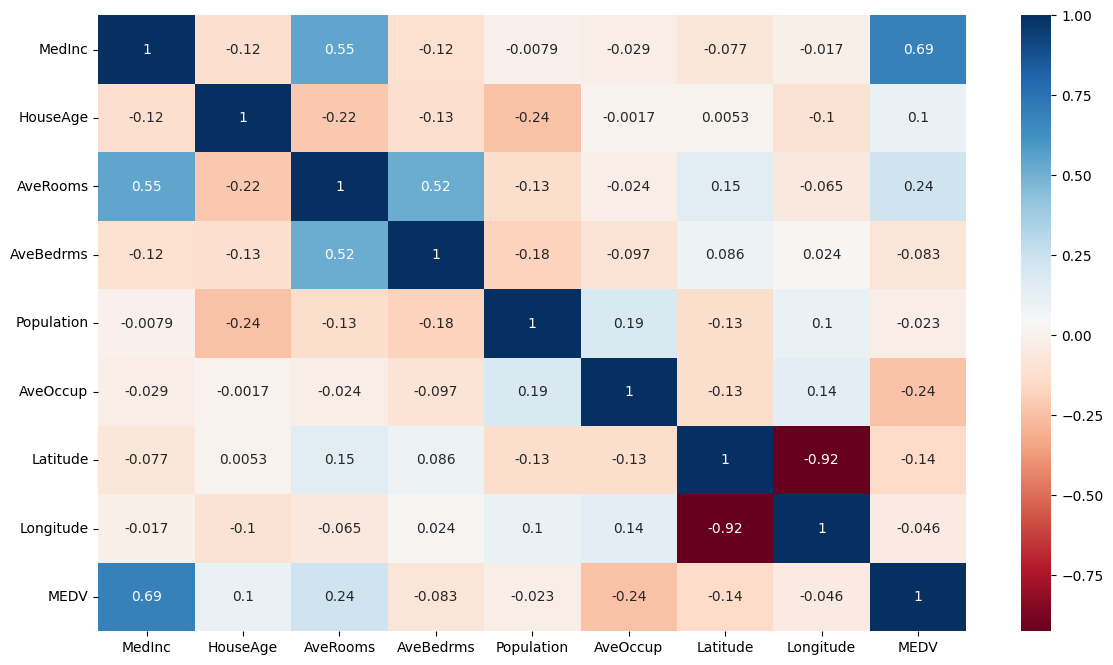

In [80]:
# train_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True, cmap='RdBu')

<Axes: xlabel='Latitude', ylabel='Longitude'>

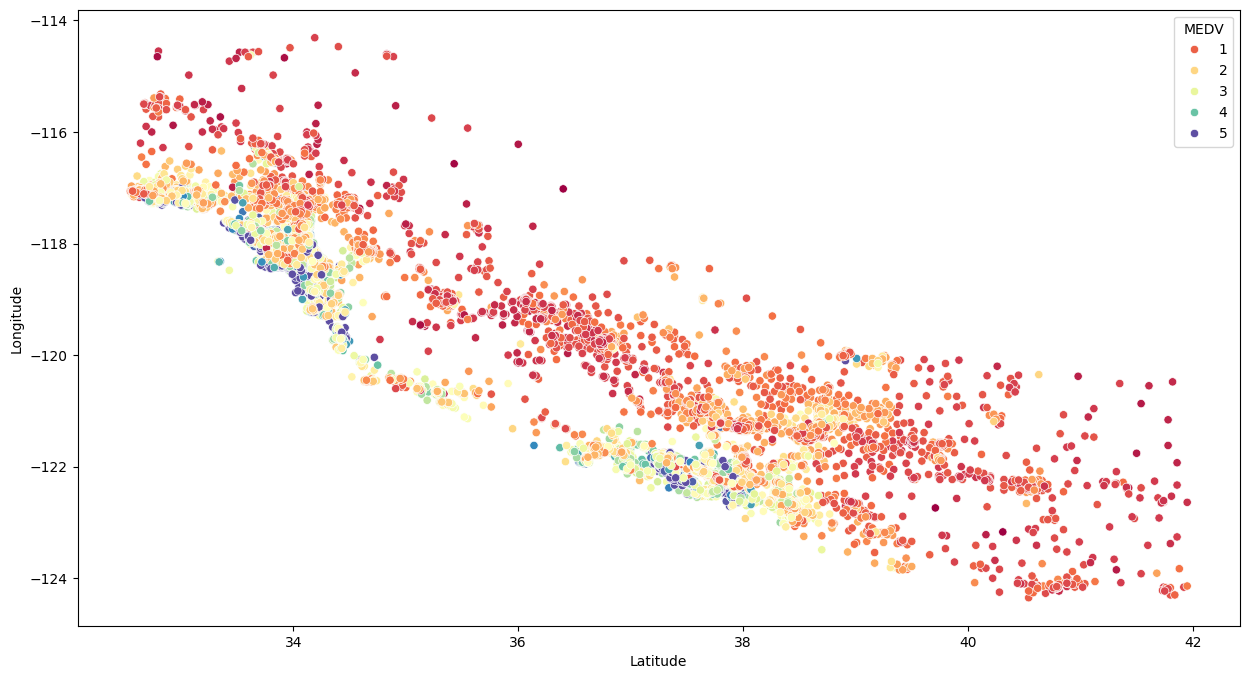

In [93]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= 'Latitude', y='Longitude', data=train_data, hue='MEDV', palette='Spectral')

# train_data.dtypes

# Join Test Data

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

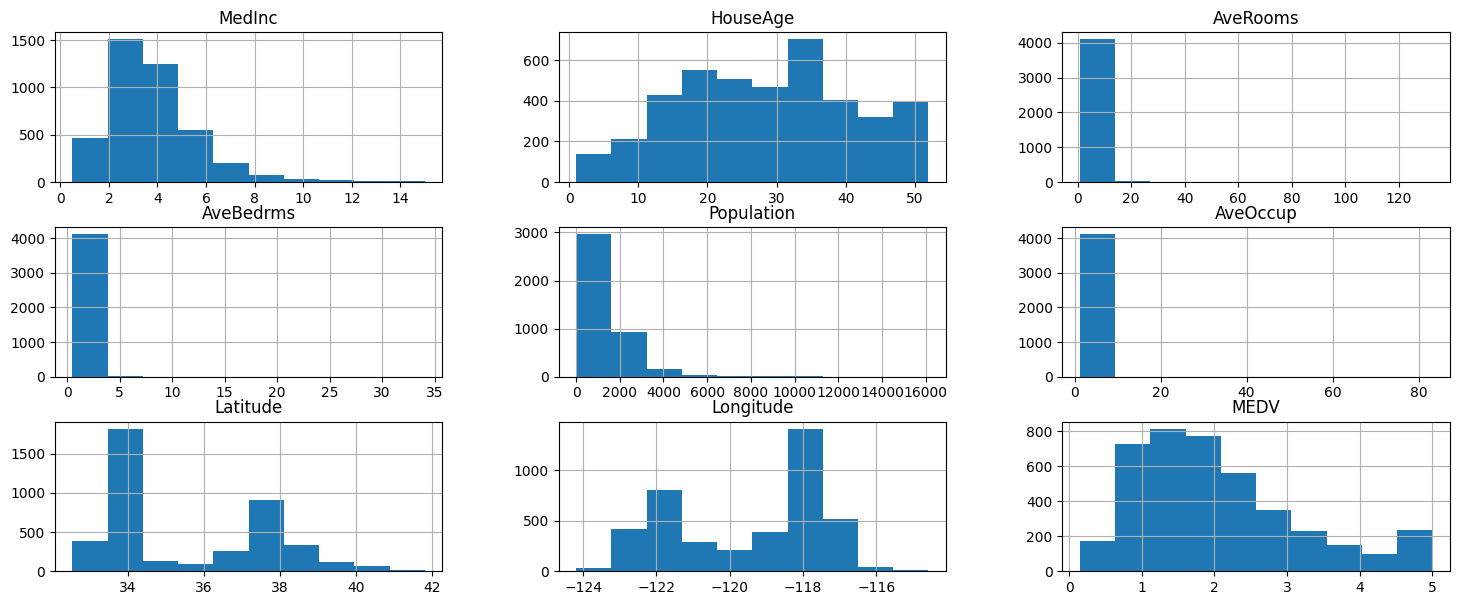

In [94]:
# Join the X train and y train data
test_data = X_test.join(y_test)

# Show the Histogram first
test_data.hist(figsize=(18, 7))

# Pass into log values

In [129]:
test_data['AveRooms'] = np.log(test_data['AveRooms'] + 1)
test_data['AveBedrms'] = np.log(test_data['AveBedrms'] + 1)
test_data['Population'] = np.log(test_data['Population'] + 1)
test_data['AveOccup'] = np.log(test_data['AveOccup'] + 1)


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

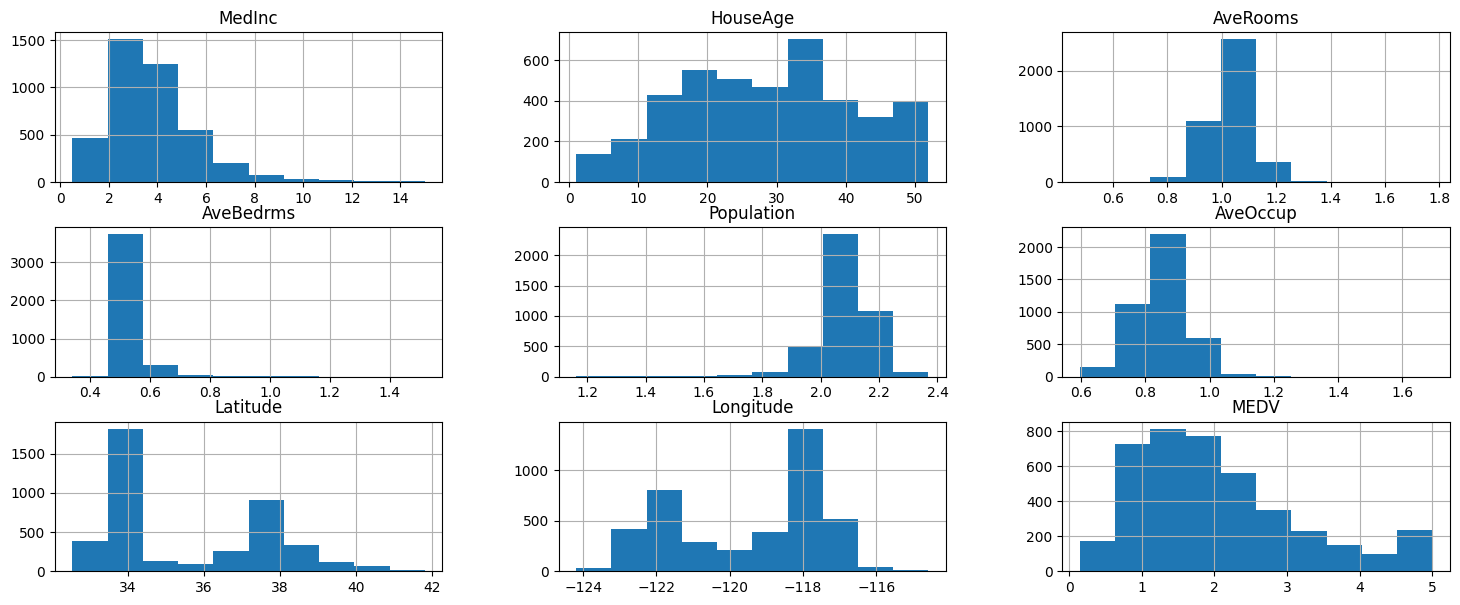

In [130]:
# Show the Histogram first
test_data.hist(figsize=(18, 7))

In [114]:
lineareg = LinearRegression()
lineareg.fit(X_test, y_test)

lineareg.score(X_test, y_test)

0.5960546504330062

## Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

In [123]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
forest.score(X_test, y_test)

0.8068831308178718